In [1]:
import pandas as pd
import copy
from sklearn.preprocessing import LabelEncoder
from scipy import sparse
import scipy
import numpy as np
import anndata
import matplotlib.pyplot as plt

import bokeh.plotting
import bokeh.io
bokeh.io.output_notebook()

import scanpy as sc
import seaborn as sns
from collections import OrderedDict
from Bio import SeqIO
import os
import glob

from scipy import io
import time
from scipy import stats

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
sns.set()

Loading BokehJS ...

In [2]:
work_folder = '/home/nadia/isoformDE/data/outputs/'


In [3]:
matrix_onecell = pd.read_csv(work_folder+'HYa1/'+'SM-GE8WT_S262_E1-50_kallisto/'+'abundance.tsv',sep='\t')


In [4]:
matrix_onecell.tail(10)

,target_id,length,eff_length,est_counts,tpm
116057,ENSMUST00000181878.2,1524,1355.510,0.0,0.0
116058,ENSMUST00000201504.1,545,378.327,0.0,0.0
116059,ENSMUST00000181583.4,387,228.134,0.0,0.0
116060,ENSMUST00000181459.3,451,287.558,0.0,0.0
116061,ENSMUST00000200975.1,549,382.251,0.0,0.0
116062,ENSMUST00000202689.1,545,378.327,0.0,0.0
116063,ENSMUST00000230354.1,375,217.072,0.0,0.0
116064,ENSMUST00000202219.1,639,471.046,0.0,0.0
116065,ENSMUST00000202716.1,795,626.641,0.0,0.0
116066,ENSMUST00000200997.1,835,666.510,0.0,0.0


In [5]:
df = pd.DataFrame(index = matrix_onecell.target_id)

In [6]:
# Glob string for images
cells_glob = os.path.join(work_folder,'HYa1/*/abundance.tsv')

# Get list of files in directory
cells_list = sorted(glob.glob(cells_glob))

# Let's look at the list
cells_list
cell_names = []
for i in cells_list:
    cell_names.append(i[40:59])
#cell_names

In [7]:
cells_list[:3]

['/home/nadia/isoformDE/data/outputs/HYa1/SM-GE8WS_S025_E1-50_kallisto/abundance.tsv',
 '/home/nadia/isoformDE/data/outputs/HYa1/SM-GE8WS_S026_E1-50_kallisto/abundance.tsv',
 '/home/nadia/isoformDE/data/outputs/HYa1/SM-GE8WS_S027_E1-50_kallisto/abundance.tsv']

In [8]:
matrix_onecell.est_counts.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: est_counts, dtype: float64

In [9]:
cells_list[:10]

['/home/nadia/isoformDE/data/outputs/HYa1/SM-GE8WS_S025_E1-50_kallisto/abundance.tsv',
 '/home/nadia/isoformDE/data/outputs/HYa1/SM-GE8WS_S026_E1-50_kallisto/abundance.tsv',
 '/home/nadia/isoformDE/data/outputs/HYa1/SM-GE8WS_S027_E1-50_kallisto/abundance.tsv',
 '/home/nadia/isoformDE/data/outputs/HYa1/SM-GE8WS_S028_E1-50_kallisto/abundance.tsv',
 '/home/nadia/isoformDE/data/outputs/HYa1/SM-GE8WS_S030_E1-50_kallisto/abundance.tsv',
 '/home/nadia/isoformDE/data/outputs/HYa1/SM-GE8WS_S031_E1-50_kallisto/abundance.tsv',
 '/home/nadia/isoformDE/data/outputs/HYa1/SM-GE8WS_S032_E1-50_kallisto/abundance.tsv',
 '/home/nadia/isoformDE/data/outputs/HYa1/SM-GE8WS_S042_E1-50_kallisto/abundance.tsv',
 '/home/nadia/isoformDE/data/outputs/HYa1/SM-GE8WS_S043_E1-50_kallisto/abundance.tsv',
 '/home/nadia/isoformDE/data/outputs/HYa1/SM-GE8WS_S044_E1-50_kallisto/abundance.tsv']

In [34]:
#%%time

df = pd.DataFrame(index = matrix_onecell.target_id)
number = 0
for cell in cells_list:
    number += 1
    matrix_onecell = pd.read_csv(cell,sep='\t')
    df['HYa1_cell'+str(number)]=list(matrix_onecell.est_counts)
#    print(df.head(1))
    
#otherDF = df
    

In [37]:
df.shape

(116067, 1032)

In [38]:
df.to_csv('/home/nadia/isoformDE/data/HYa1_pandas.csv')

In [23]:
df.head()

""
target_id
ENSMUST00000196221.1
ENSMUST00000179664.1
ENSMUST00000177564.1
ENSMUST00000178537.1
ENSMUST00000178862.1


In [43]:
HYa1adata = sc.read('/home/nadia/isoformDE/data/HYa1_pandas.csv',sep=',')
    
    
"""anno = pd.read_csv(filename_sample_annotation)
adata.obs['cell_groups'] = anno['cell_groups']  # categorical annotation of type pandas.Categorical
adata.obs['time'] = anno['time']                # numerical annotation of type float
# alternatively, you could also set the whole dataframe
# adata.obs = anno


adata.write(filename)

"""

"anno = pd.read_csv(filename_sample_annotation)\nadata.obs['cell_groups'] = anno['cell_groups']  # categorical annotation of type pandas.Categorical\nadata.obs['time'] = anno['time']                # numerical annotation of type float\n# alternatively, you could also set the whole dataframe\n# adata.obs = anno\n\n\nadata.write(filename)\n\n"

In [44]:
adata = HYa1adata

In [52]:
adata = adata.T

In [97]:
adata.obs_names

Index(['HYa1_cell1', 'HYa1_cell2', 'HYa1_cell3', 'HYa1_cell4', 'HYa1_cell5',
       'HYa1_cell6', 'HYa1_cell7', 'HYa1_cell8', 'HYa1_cell9', 'HYa1_cell10',
       ...
       'HYa1_cell1023', 'HYa1_cell1024', 'HYa1_cell1025', 'HYa1_cell1026',
       'HYa1_cell1027', 'HYa1_cell1028', 'HYa1_cell1029', 'HYa1_cell1030',
       'HYa1_cell1031', 'HYa1_cell1032'],
      dtype='object', length=1032)

In [53]:
adata

AnnData object with n_obs × n_vars = 1032 × 116067 

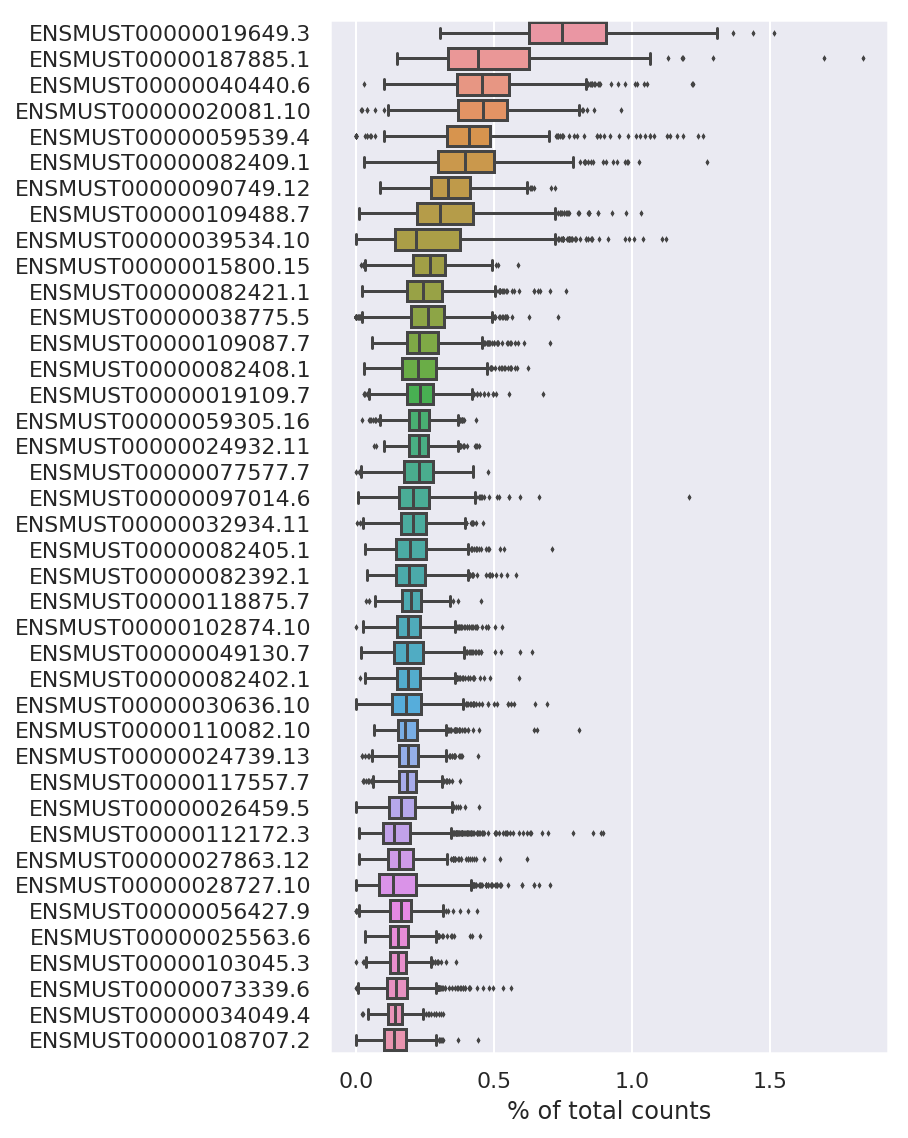

In [54]:
sc.pl.highest_expr_genes(adata, n_top=40)


In [56]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

In [57]:
adata

AnnData object with n_obs × n_vars = 1032 × 90515 
    obs: 'n_genes'
    var: 'n_cells'

In [65]:
adata.obs['n_counts'] = adata.X.sum(1)

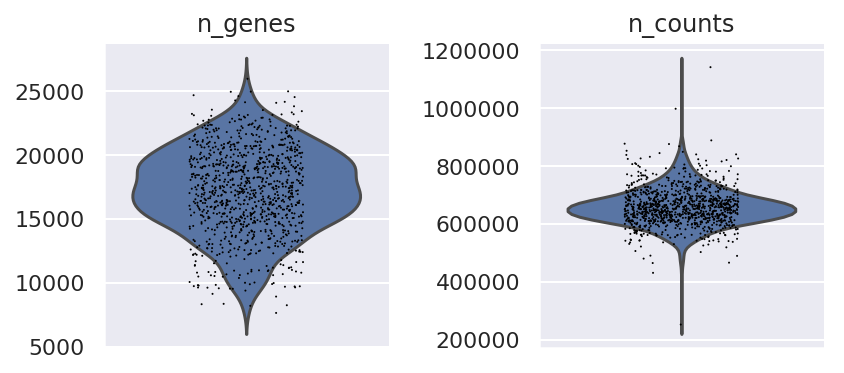

In [66]:
sc.pl.violin(adata, ['n_genes', 'n_counts'],
             jitter=0.2, multi_panel=True)

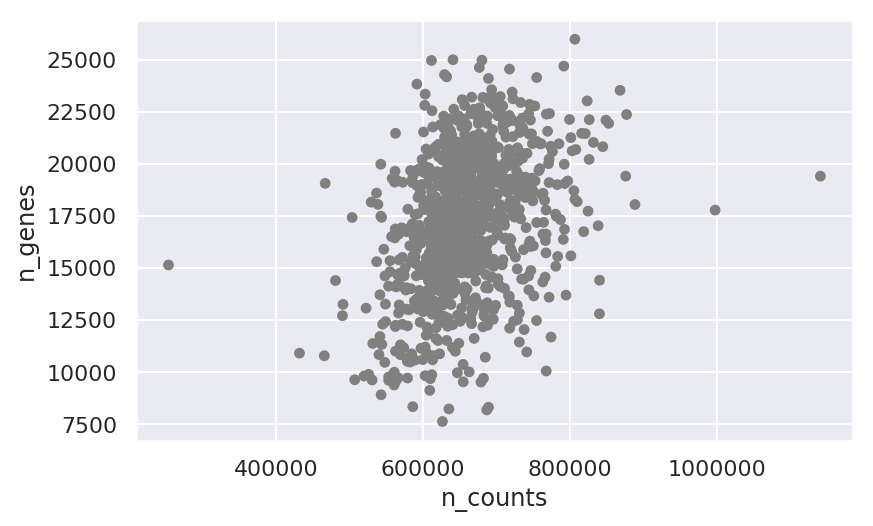

In [67]:
#sc.pl.scatter(adata, x='n_counts', y='percent_mito')
sc.pl.scatter(adata, x='n_counts', y='n_genes')

In [68]:
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)


In [69]:
sc.pp.log1p(adata)


In [70]:
sc.pp.highly_variable_genes(adata, min_mean=0.000001, max_mean=300, min_disp=0.0001)

#sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)



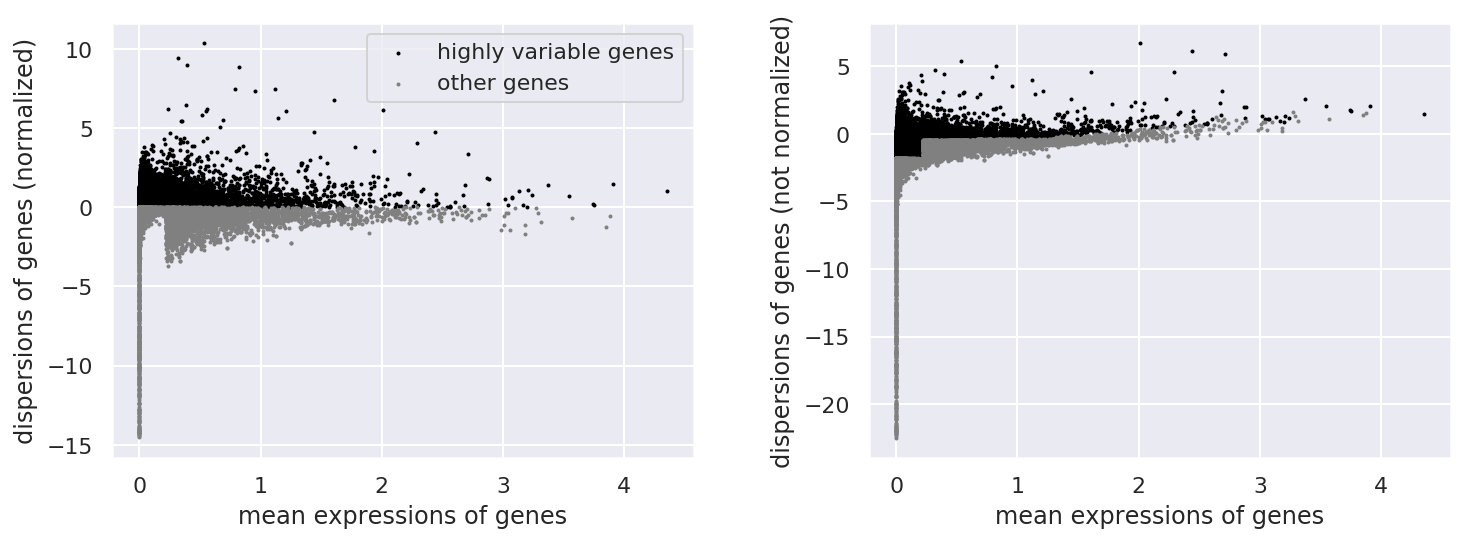

In [71]:
sc.pl.highly_variable_genes(adata)


In [72]:
adata = adata[:, adata.var['highly_variable']]


In [87]:
q = list(adata.var_names)

In [88]:
tr = []
for i in q:
    tr.append(i[:-2])

In [94]:
print(len(tr),len(set(tr)))

48794 48794


In [85]:
mouse_gene_ids = pd.read_csv('/home/nadia/transcriptomes/mouse_gene_ids.csv', index_col = 0)

In [96]:
mouse_gene_ids = mouse_gene_ids.sort_values('gene_ids')

In [74]:
sc.pp.regress_out(adata, ['n_counts'])


In [75]:
sc.pp.scale(adata, max_value=10)


In [76]:
sc.tl.pca(adata, svd_solver='arpack')


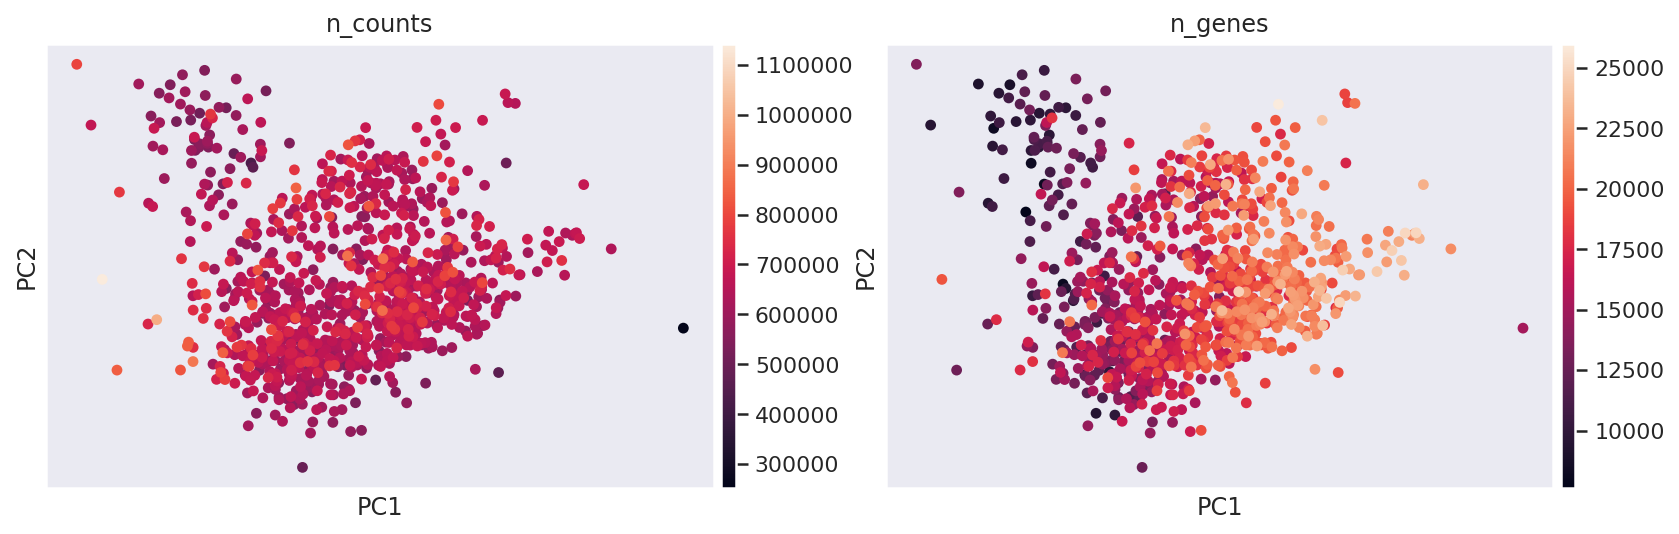

In [101]:
sc.pl.pca(adata, color=['n_counts','n_genes'])


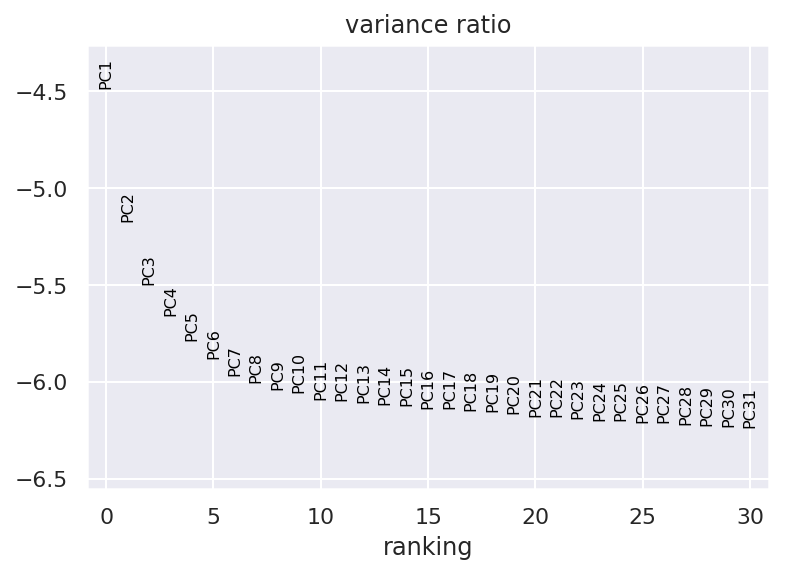

In [78]:
sc.pl.pca_variance_ratio(adata, log=True)


In [79]:
sc.pp.neighbors(adata)


In [80]:
sc.tl.umap(adata)


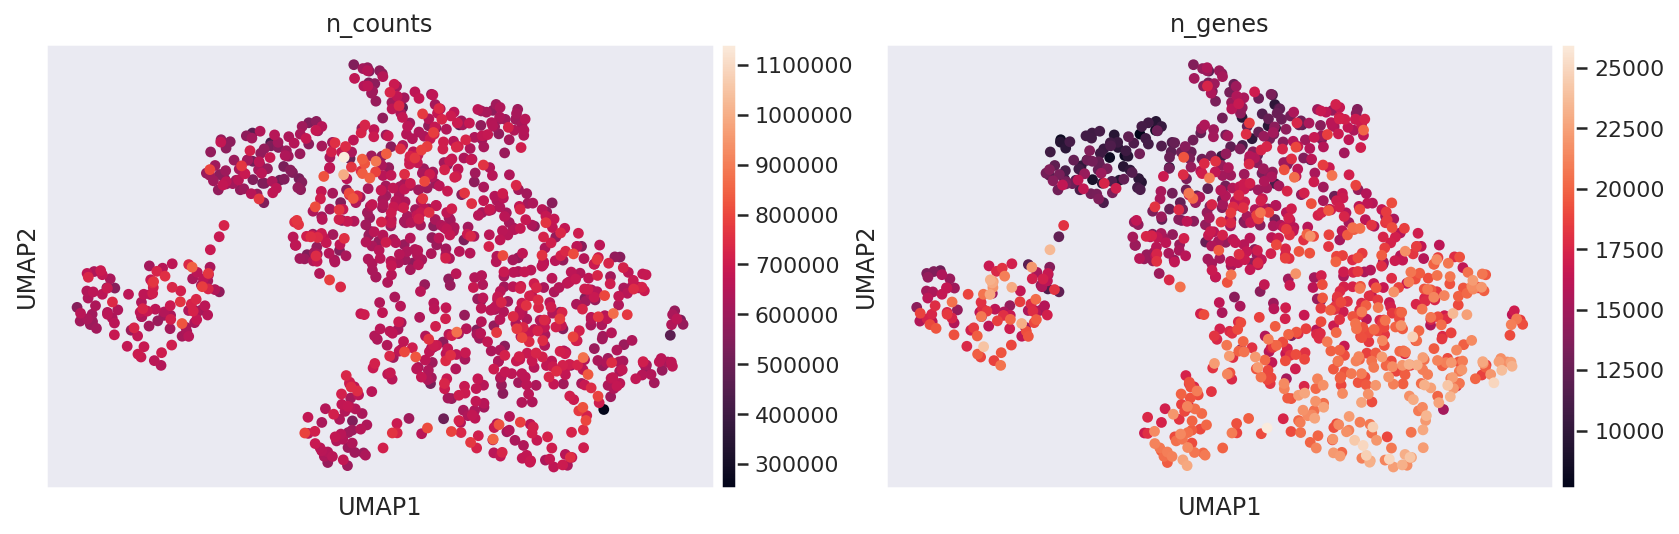

In [81]:
sc.pl.umap(adata, color=[ 'n_counts', 'n_genes'])
